<a href="https://colab.research.google.com/github/andylws/SNU_Lecture_Ambient-AI-Platforms-and-Practice/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW1(~9/13)
HW1_학번_이름.ipynb 형태로 저장하여 Jupyter Notebook을 그대로 제출! <br>
(예: HW1_2020_12345_keondo.ipynb) <br>
훈련을 진행하고 Output을 지우지 말고 제출할 것!

In [27]:
import tensorflow as tf
from sklearn import model_selection
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Conv2D, Concatenate, Flatten, Add, MaxPooling2D, GlobalAveragePooling2D

## Problem 1: CIFAR10 데이터셋을 이용하여 MLP 모델 만들고 훈련시키기
다른 데이터셋을 이용하여 스스로 MLP를 구성하고 훈련해 보자. <br>
10개의 서로 다른 class를 가진 CIFAR10 데이터셋을 이용하여 비슷하게 MLP 모델을 만들고 훈련하여 제출하시오. <br>
모델은 최소한 3개 이상의 Dense layer를 사용하여 구성하여야 하고 0.4 이상의 Validation accuracy를 달성할 때까지 훈련을 진행하시오. 또한 Regularizer를 한번 이상 활용하시오.(Dropout 제외) <br>
*주의*: Fashion MNIST와 CIFAR10은 Input의 shape가 다르므로 이를 잘 고려해야 한다.

In [2]:
cifar10 = tf.keras.datasets.cifar10

#Load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#Split train set into train/valid set
x_train, x_valid, y_train, y_valid = model_selection.train_test_split(x_train, y_train,test_size=0.2)

#Rescale data to be in the range of [0,1]
x_train, x_valid, x_test = x_train / 255.0, x_valid / 255.0, x_test / 255.0
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 [==============================] - 4s 0us/step


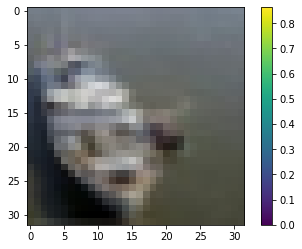

In [3]:
#Let's look at the sample data
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

---
여기부터 수강생의 코드를 추가하시오

In [18]:
##################
    # Your code here
################### 

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(234, activation='sigmoid'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax', kernel_regularizer='l2'),
])

In [19]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
optim_fn = tf.keras.optimizers.Adam(lr=0.001)

model.compile(optimizer=optim_fn,
              loss=loss_fn,
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_10 (Dense)            (None, 234)               719082    
                                                                 
 dense_11 (Dense)            (None, 128)               30080     
                                                                 
 dense_12 (Dense)            (None, 32)                4128      
                                                                 
 dense_13 (Dense)            (None, 10)                330       
                                                                 
Total params: 753,620
Trainable params: 753,620
Non-trainable params: 0
_________________________________________________________________


In [21]:
hist = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))

Epoch 1/10
1250/1250 [==============================] - 8s 6ms/step - loss: 1.9946 - accuracy: 0.2833 - val_loss: 1.8823 - val_accuracy: 0.3303
Epoch 2/10
1250/1250 [==============================] - 8s 6ms/step - loss: 1.8335 - accuracy: 0.3456 - val_loss: 1.7993 - val_accuracy: 0.3460
Epoch 3/10
1250/1250 [==============================] - 8s 6ms/step - loss: 1.7704 - accuracy: 0.3674 - val_loss: 1.7591 - val_accuracy: 0.3728
Epoch 4/10
1250/1250 [==============================] - 8s 6ms/step - loss: 1.7344 - accuracy: 0.3799 - val_loss: 1.6993 - val_accuracy: 0.3953
Epoch 5/10
1250/1250 [==============================] - 8s 6ms/step - loss: 1.6999 - accuracy: 0.3900 - val_loss: 1.7777 - val_accuracy: 0.3718
Epoch 6/10
1250/1250 [==============================] - 8s 7ms/step - loss: 1.6724 - accuracy: 0.3987 - val_loss: 1.6695 - val_accuracy: 0.4031
Epoch 7/10
1250/1250 [==============================] - 8s 7ms/step - loss: 1.6685 - accuracy: 0.4047 - val_loss: 1.6840 - val_accuracy:

In [22]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 1.6074 - accuracy: 0.4257 - 641ms/epoch - 2ms/step


[1.6074117422103882, 0.42570000886917114]

## Problem 2: 간단한 ResNet 구현

다음은 MLP layer만을 간단하게 구현한 ResNet-11 모델의 구조이다. 

`ResBlock`함수를 작성한 다음 `ResNet11`함수를 이용하여 ResNet-11를 구현해보자.
- 조건1: 1번째 ResBlock의 node는 100개, 2,3번째 ResBlock의 node는 200개를 사용한다.
- 조건2: 마지막 Layer의 node 수는 10개이다.
- 조건3: Activation은 모두 ReLU를 사용한다. 단, 마지막 layer에서는 Softmax activation을 사용한다. 
![resnet11.png](attachment:resnet11.png)


ResNet에 대해서는 다음 문서 참조:(https://openaccess.thecvf.com/content_cvpr_2016/papers/He_Deep_Residual_Learning_CVPR_2016_paper.pdf) 

In [28]:
def ResBlock(x, nodes):
    ##################
    # Your code here
    ##################    
    x = Dense(nodes, activation='relu')(x)
    shortcut = x
    x = Dense(nodes, activation='relu')(x)
    x = Dense(nodes, activation='relu')(x)
    x = Add()([x, shortcut])

    ##################
    
    return x    

In [32]:
def ResNet11():
    inputs = Input(shape=(224, 224, 3))    
    x = Flatten()(inputs)
    x = Dense(100)(x)
    ##################
    # Your code here
    ##################
    x = ResBlock(x, 100)
    x = ResBlock(x, 200)
    x = ResBlock(x, 200)
    outputs = Dense(10, activation='softmax')(x)
    ##################
    return tf.keras.Model(inputs=inputs, outputs=outputs)

In [33]:
resnet11 = ResNet11()

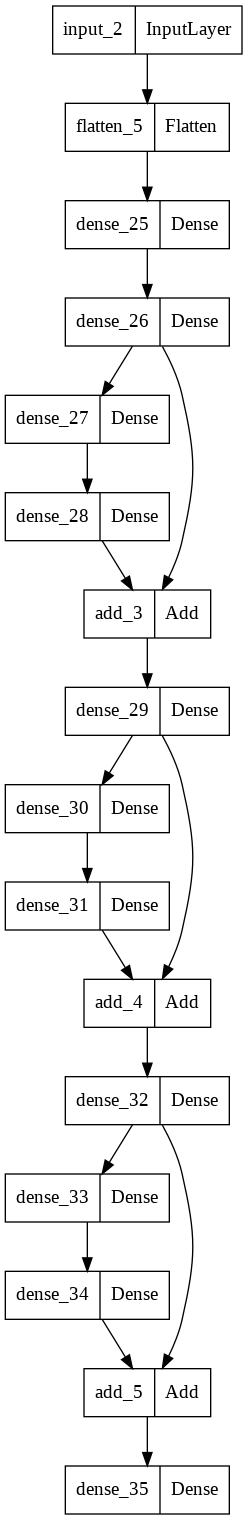

In [34]:
tf.keras.utils.plot_model(resnet11, to_file='resnet11.png')